In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [13]:
#Carregar o dataset
df_customers = pd.read_csv('../dados/olist_customers_dataset.csv')
df_geolocations = pd.read_csv('../dados/olist_geolocation_dataset.csv')
df_items = pd.read_csv('../dados/olist_order_items_dataset.csv')
df_payments = pd.read_csv('../dados/olist_order_payments_dataset.csv')
df_reviews = pd.read_csv('../dados/olist_order_reviews_dataset.csv', on_bad_lines='warn')
df_orders = pd.read_csv('../dados/olist_orders_dataset.csv')
df_products = pd.read_csv('../dados/olist_products_dataset.csv')
df_sellers = pd.read_csv('../dados/olist_sellers_dataset.csv')
df_translation = pd.read_csv('../dados/product_category_name_translation.csv')

In [14]:
# Fazendo merge nos dataframes
df_orders_items = pd.merge(df_orders, df_items, on='order_id')
df_orders_items_payments = pd.merge(df_orders_items, df_payments, on='order_id')
df_orders_items_payments_reviews = pd.merge(df_orders_items_payments, df_reviews, on='order_id')
df_orders_items_payments_reviews_customers = pd.merge(df_orders_items_payments_reviews, df_customers, on='customer_id')
df_orders_items_payments_reviews_customers_sellers = pd.merge(df_orders_items_payments_reviews_customers, df_sellers, on='seller_id')
df_orders_items_payments_reviews_customers_sellers_products = pd.merge(df_orders_items_payments_reviews_customers_sellers, df_products, on='product_id')
df = pd.merge(df_orders_items_payments_reviews_customers_sellers_products, df_translation, on='product_category_name' )

In [15]:
#Copiando o df
eda_df = df.copy()

In [16]:
#Confirmando se o merge foi bem sucedido, mostrando as 5 primeiras linhas
eda_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,seller_state,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,...,SP,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,...,SP,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,...,SP,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [17]:
#Resumo do DataFrame
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115608 entries, 0 to 115607
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115608 non-null  object 
 1   customer_id                    115608 non-null  object 
 2   order_status                   115608 non-null  object 
 3   order_purchase_timestamp       115608 non-null  object 
 4   order_approved_at              115594 non-null  object 
 5   order_delivered_carrier_date   114413 non-null  object 
 6   order_delivered_customer_date  113208 non-null  object 
 7   order_estimated_delivery_date  115608 non-null  object 
 8   order_item_id                  115608 non-null  int64  
 9   product_id                     115608 non-null  object 
 10  seller_id                      115608 non-null  object 
 11  shipping_limit_date            115608 non-null  object 
 12  price                         

In [18]:
#Verificando linhas x colunas
eda_df.shape

(115608, 40)

In [19]:
#transformando as colunas de data para datetime

date_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'shipping_limit_date',
    'review_creation_date',
    'review_answer_timestamp'
]

for col in date_columns:
    eda_df[col] = pd.to_datetime(eda_df[col])

In [20]:
#feature engineering
eda_df['delivery_time_days'] = (eda_df['order_delivered_customer_date'] - eda_df['order_purchase_timestamp']).dt.days
eda_df['shipping_delay'] = (eda_df['order_delivered_customer_date'] - eda_df['order_estimated_delivery_date']).dt.days
eda_df['approval_delay'] = (eda_df['order_approved_at'] - eda_df['order_purchase_timestamp']).dt.total_seconds()/3600
eda_df['purchase_dayofweek'] = eda_df['order_purchase_timestamp'].dt.dayofweek
eda_df['purchase_hour'] = eda_df['order_purchase_timestamp'].dt.hour


In [21]:
#Estatística descritiva
eda_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,shipping_limit_date,price,freight_value,payment_sequential,...,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,delivery_time_days,shipping_delay,approval_delay,purchase_dayofweek,purchase_hour
count,115608,115594,114413,113208,115608,115608.000000,115608,115608.000000,115608.000000,115608.000000,...,115608.000000,115607.000000,115607.000000,115607.000000,115607.000000,113208.000000,113208.000000,115594.000000,115608.000000,115608.000000
mean,2017-12-31 04:29:44.160905984,2017-12-31 15:55:43.188738304,2018-01-04 05:50:05.535384832,2018-01-13 17:22:13.241405440,2018-01-24 01:16:59.389661696,1.194537,2018-01-06 20:01:29.755250176,120.620678,20.056898,1.093748,...,2.205384,2113.912142,30.307948,16.638525,23.113185,11.976768,-12.092352,10.503000,2.747353,14.764419
min,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-20 00:00:00,1.000000,2016-09-19 00:15:34,0.850000,0.000000,1.000000,...,1.000000,0.000000,7.000000,2.000000,6.000000,0.000000,-147.000000,0.000000,0.000000,0.000000
25%,2017-09-12 11:14:11,2017-09-12 18:07:14.500000,2017-09-15 17:38:01,2017-09-25 18:15:06.249999872,2017-10-03 00:00:00,1.000000,2017-09-19 08:24:41.750000128,39.900000,13.080000,1.000000,...,1.000000,300.000000,18.000000,8.000000,15.000000,6.000000,-17.000000,0.215833,1.000000,11.000000
50%,2018-01-19 03:30:43,2018-01-19 14:57:12.500000,2018-01-23 23:48:29,2018-02-02 01:44:06,2018-02-15 00:00:00,1.000000,2018-01-25 19:37:13,74.900000,16.320000,1.000000,...,1.000000,700.000000,25.000000,13.000000,20.000000,10.000000,-13.000000,0.347500,3.000000,15.000000
75%,2018-05-04 15:57:17.500000,2018-05-05 02:13:51.500000,2018-05-08 13:01:00,2018-05-15 19:55:53.750000128,2018-05-28 00:00:00,1.000000,2018-05-10 13:50:39,134.900000,21.210000,1.000000,...,3.000000,1800.000000,38.000000,20.000000,30.000000,15.000000,-7.000000,14.980486,4.000000,19.000000
max,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,21.000000,2020-04-09 22:35:08,6735.000000,409.680000,29.000000,...,20.000000,40425.000000,105.000000,105.000000,118.000000,208.000000,188.000000,1450.866389,6.000000,23.000000
std,NaN,NaN,NaN,NaN,NaN,0.685929,NaN,182.654049,15.836251,0.729852,...,1.717775,3781.770949,16.211171,13.473618,11.755132,9.362222,10.090860,22.264064,1.961087,5.321931


In [22]:
#Somando nulos (etapa de pré-tratamento de dados)
eda_df.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1195
order_delivered_customer_date      2400
order_estimated_delivery_date         0
order_item_id                         0
product_id                            0
seller_id                             0
shipping_limit_date                   0
price                                 0
freight_value                         0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
review_id                             0
review_score                          0
review_comment_title             101807
review_comment_message            66707
review_creation_date                  0
review_answer_timestamp               0
customer_unique_id                    0


In [23]:
# Preenchendo dados nulos com ''
eda_df['review_comment_message'].fillna('', inplace=True)

# Deletando coluna review title (muitos valores nulos)
eda_df.drop(columns=['review_comment_title'], inplace=True)

# Deletando linhas com dados de data faltando
eda_df.dropna(subset=[
    'order_approved_at',
    'order_delivered_customer_date',
    'order_delivered_carrier_date' 
], inplace=True)


In [24]:
#Preenchendo NaN com a mediana da própria coluna
num_cols = ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']
for col in num_cols:
    eda_df[col].fillna(eda_df[col].median(), inplace=True)


In [25]:
#Verificando se ainda possui valores nulos
eda_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
review_id                        0
review_score                     0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
seller_zip_code_prefix           0
seller_city         

In [26]:
#Verificando as mensagens do review
eda_df['review_comment_message']

0         Não testei o produto ainda, mas ele veio corre...
1         Não testei o produto ainda, mas ele veio corre...
2         Não testei o produto ainda, mas ele veio corre...
3                                      Muito bom o produto.
4                                                          
                                ...                        
115603         So uma peça que veio rachado mas tudo bem rs
115604                         Foi entregue antes do prazo.
115605    Foi entregue somente 1. Quero saber do outro p...
115606    Foi entregue somente 1. Quero saber do outro p...
115607                                                     
Name: review_comment_message, Length: 113193, dtype: object

In [27]:
#Verificando o score do review
eda_df['review_score']

0         4
1         4
2         4
3         4
4         5
         ..
115603    4
115604    5
115605    2
115606    2
115607    5
Name: review_score, Length: 113193, dtype: int64

In [28]:
#Função para analisar o sentimento de acordo com o score
def score_to_sentiment(score):
    if score == 5 or score == 4:
        return 'Positivo'
    elif score == 3:
        return 'Neutro'
    else:
        return 'Negativo'

eda_df['review_comment_message_clean_sentiment'] = eda_df['review_score'].apply(score_to_sentiment)



Text(0, 0.5, 'Soma')

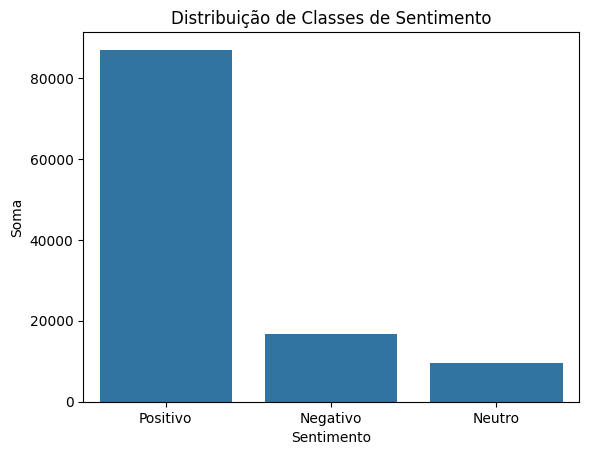

In [29]:
#Gráfico de Colunas
sns.countplot(x='review_comment_message_clean_sentiment', data=eda_df)
plt.title('Distribuição de Classes de Sentimento')
plt.xlabel('Sentimento')
plt.ylabel('Soma')


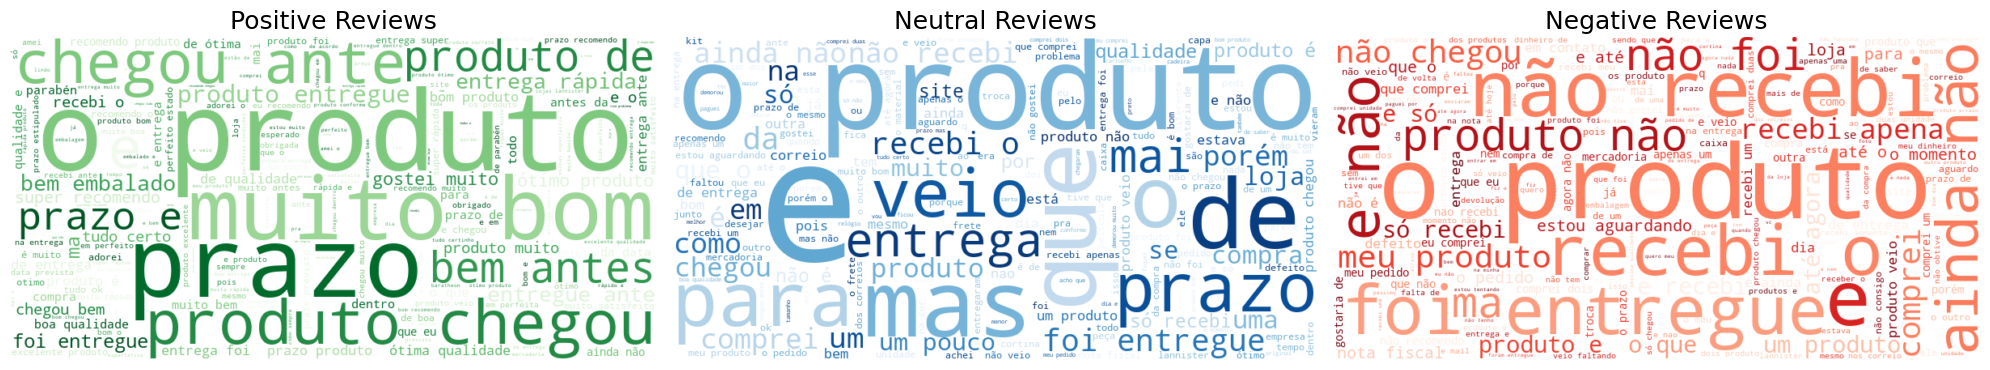

In [30]:
#Criação de Nuvem de Palavras
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Colocando em Minúsculo
eda_df['review_comment_message'] = eda_df['review_comment_message'].str.lower()


# Filtrando de acordo com sentimento
positive_text = ' '.join(eda_df[eda_df['review_comment_message_clean_sentiment'] == 'Positivo']['review_comment_message'])
neutral_text = ' '.join(eda_df[eda_df['review_comment_message_clean_sentiment'] == 'Neutro']['review_comment_message'])
negative_text = ' '.join(eda_df[eda_df['review_comment_message_clean_sentiment'] == 'Negativo']['review_comment_message'])

# Criando a Nuvem de Palavras
wordcloud_positive = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(positive_text)
wordcloud_neutral = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(neutral_text)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)

# Colando lado a lado
plt.figure(figsize=(20, 12))

plt.subplot(1, 3, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews', fontsize=18)

plt.subplot(1, 3, 2)
plt.imshow(wordcloud_neutral, interpolation='bilinear')
plt.axis('off')
plt.title('Neutral Reviews', fontsize=18)

plt.subplot(1, 3, 3)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews', fontsize=18)

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Pontuação da Avaliação por Sentimento')

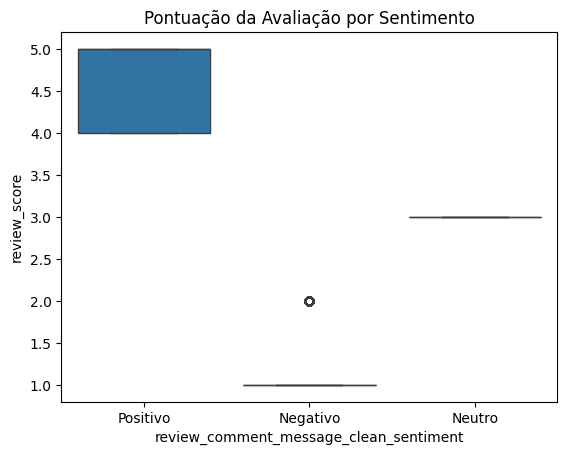

In [31]:
#Pontuação de Avaliação por sentimento
sns.boxplot(x='review_comment_message_clean_sentiment', y='review_score', data=eda_df)
plt.title('Pontuação da Avaliação por Sentimento')

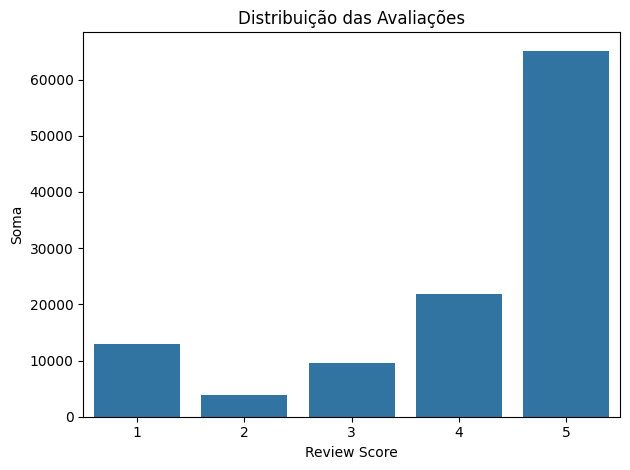

In [32]:

sns.countplot(x='review_score', data=eda_df)
plt.title('Distribuição das Avaliações')
plt.xlabel('Review Score')
plt.ylabel('Soma')
plt.tight_layout()
plt.show()

In [33]:
# Mapeamento de sentimento com números
sentiment_map = {'Negativo': -1, 'Neutro': 0, 'Positivo': 1}
eda_df['sentiment_numeric'] = eda_df['review_comment_message_clean_sentiment'].map(sentiment_map)

# Compute correlation
correlation = eda_df[['review_score', 'sentiment_numeric']].corr()
print("Correlação entre Review Score e Sentimento:", correlation.iloc[0, 1])


Correlação entre Review Score e Sentimento: 0.9517813100241386


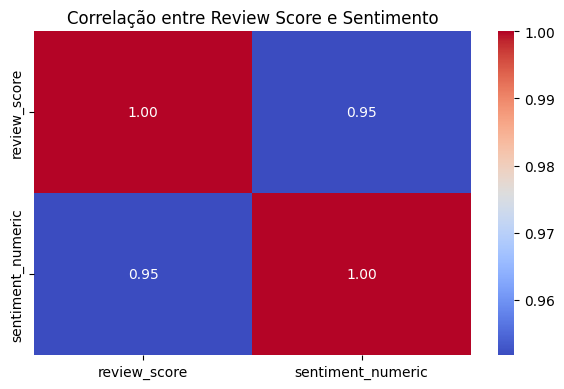

In [ ]:
# Calcular Matriz de Correlação
corr_matrix = eda_df[['review_score', 'sentiment_numeric']].corr()

# Gerar mapa de calor
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre Review Score e Sentimento')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Approval Delay (Hours)')

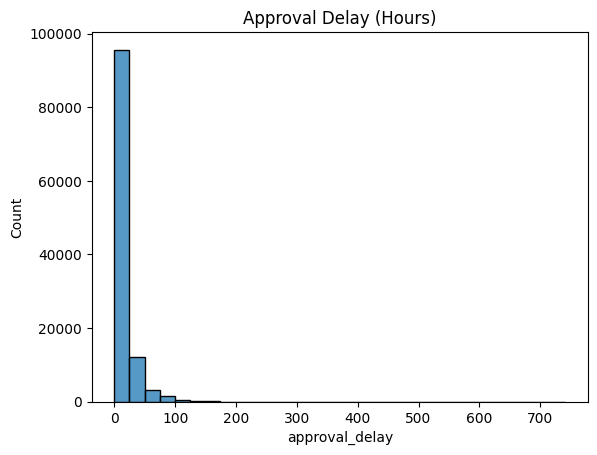

In [ ]:
#Gráfico Atração na Aprovação do Pedido (em horas)
sns.histplot(eda_df['approval_delay'], bins=30)
plt.title('Atraso na Aprovação (Horas)')


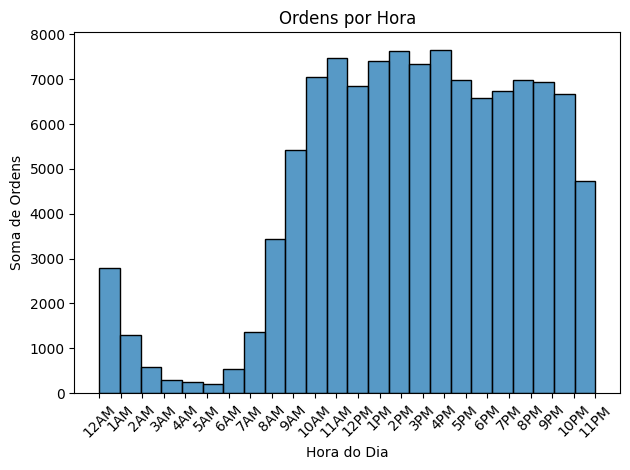

In [ ]:
# Geração de Mapa de Ordens de Pedido por Hora
sns.histplot(eda_df['purchase_hour'], bins=24)
plt.title('Ordens por Hora')
plt.xlabel('Hora do Dia')
plt.ylabel('Soma de Ordens')

# Legenda com AM/PM
hours = list(range(24))
labels = [f"{h%12 or 12}{'AM' if h < 12 else 'PM'}" for h in hours]
plt.xticks(hours, labels, rotation=45)
plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Soma de Palavras')

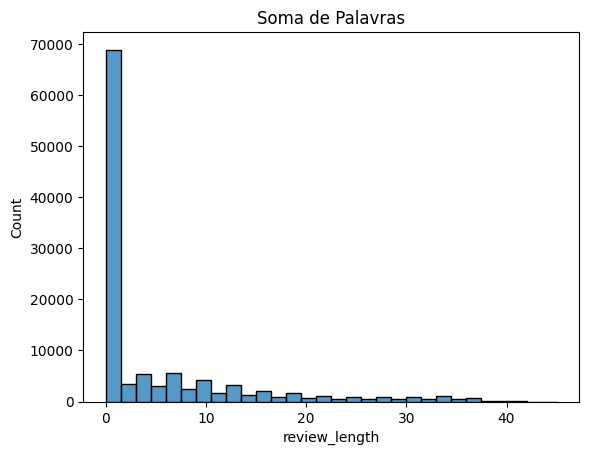

In [ ]:
eda_df['review_length'] = eda_df['review_comment_message'].apply(lambda x: len(str(x).split()))
sns.histplot(eda_df['review_length'], bins=30)
plt.title('Soma de Palavras')


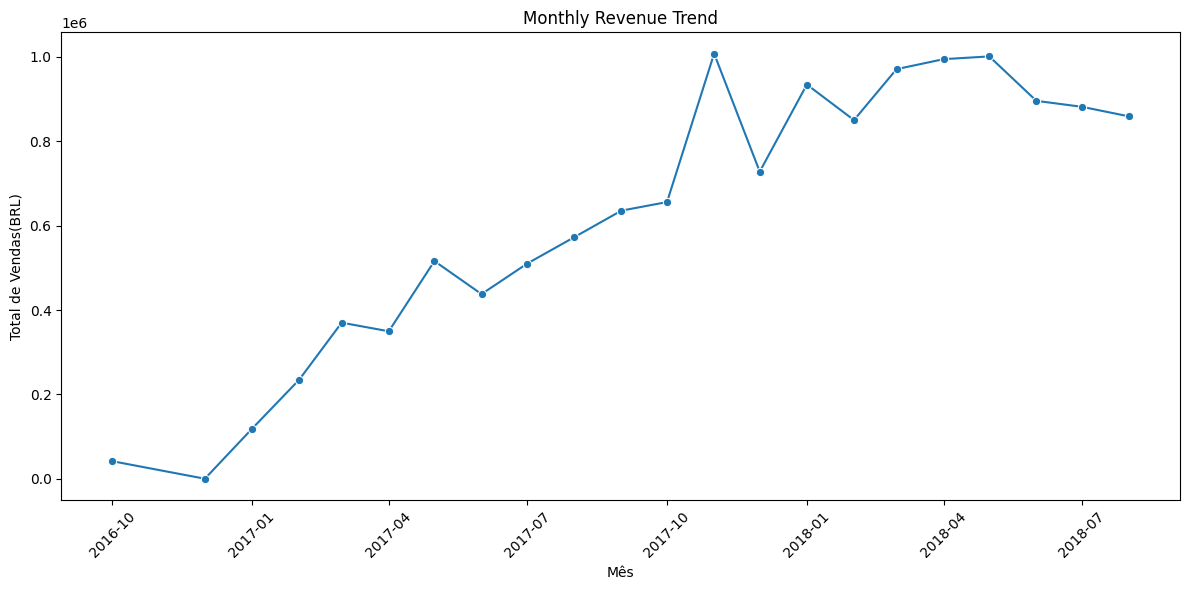

In [ ]:
# Converter order_purchase_timestamp to datetime se ainda não for convertido
#eda_df['order_purchase_timestamp'] = pd.to_datetime(eda_df['order_purchase_timestamp'])

# Criação da nova coluna para Ano-Mês
eda_df['year_month'] = eda_df['order_purchase_timestamp'].dt.to_period('M')

# Agrupar por Ano-Mês e somar o valor da coluna por total de vendas 
monthly_sales = eda_df.groupby('year_month')['price'].sum().reset_index()

# Converter ano_mes para datetime para geração de mapa
monthly_sales['year_month'] = monthly_sales['year_month'].astype(str)
monthly_sales['year_month'] = pd.to_datetime(monthly_sales['year_month'])

# Traços nas Vendas Totais
plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_sales, x='year_month', y='price', marker='o')
plt.title('Tendência de Receita Mensal')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas(BRL)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



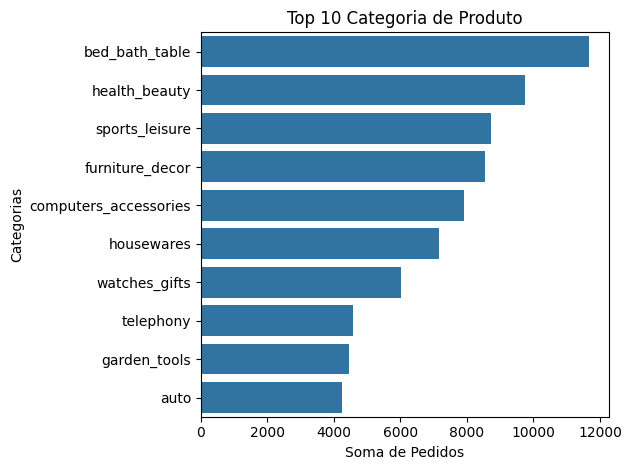

In [ ]:
#Gerando mapa das categorias mais vendidas de produto
top_categories = eda_df['product_category_name_english'].value_counts().nlargest(10)
sns.barplot(x=top_categories.values, y=top_categories.index)
plt.title('Top 10 Categoria de Produto')
plt.xlabel('Soma de Pedidos')
plt.ylabel('Categorias')
plt.tight_layout()
plt.show()


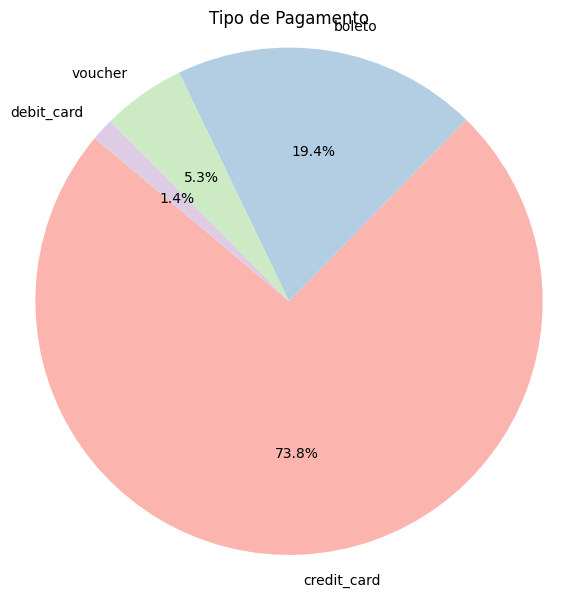

In [ ]:
# Somar cada tipo de pagamento
payment_counts = eda_df['payment_type'].value_counts()

# Gerando gráfico de pizza
plt.figure(figsize=(6,6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Tipo de Pagamento')
plt.axis('equal')  # Equal para ter certeza que a pizza é um círculo
plt.tight_layout()
plt.show()

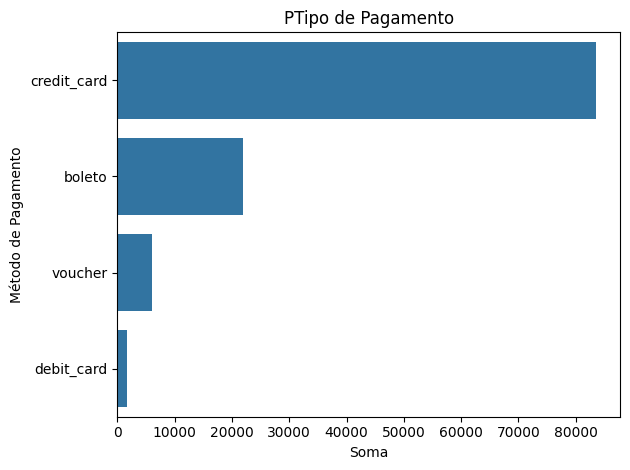

In [ ]:
#Gerando gráfico de barras horizontais dos tipos de pagamento

sns.countplot(y='payment_type', data=eda_df, order=eda_df['payment_type'].value_counts().index)
plt.title('Tipo de Pagamento')
plt.xlabel('Soma')
plt.ylabel('Método de Pagamento')
plt.tight_layout()
plt.show()


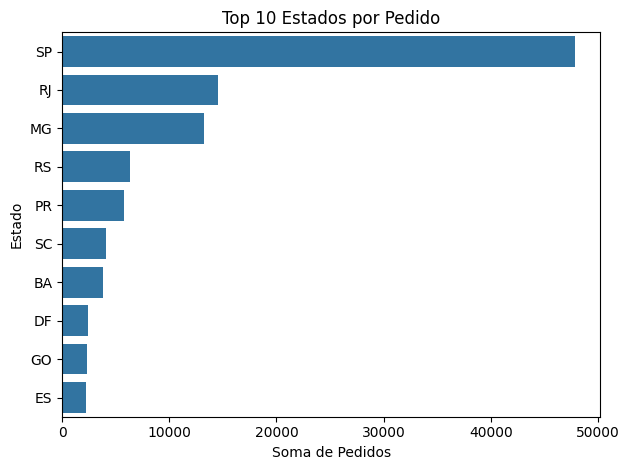

In [ ]:
#Gerando gráfico dos quant. de pedido por estado
top_states = eda_df['customer_state'].value_counts().nlargest(10)
sns.barplot(x=top_states.values, y=top_states.index)
plt.title('Top 10 Estados por Pedido')
plt.xlabel('Soma de Pedidos')
plt.ylabel('Estado')
plt.tight_layout()
plt.show()


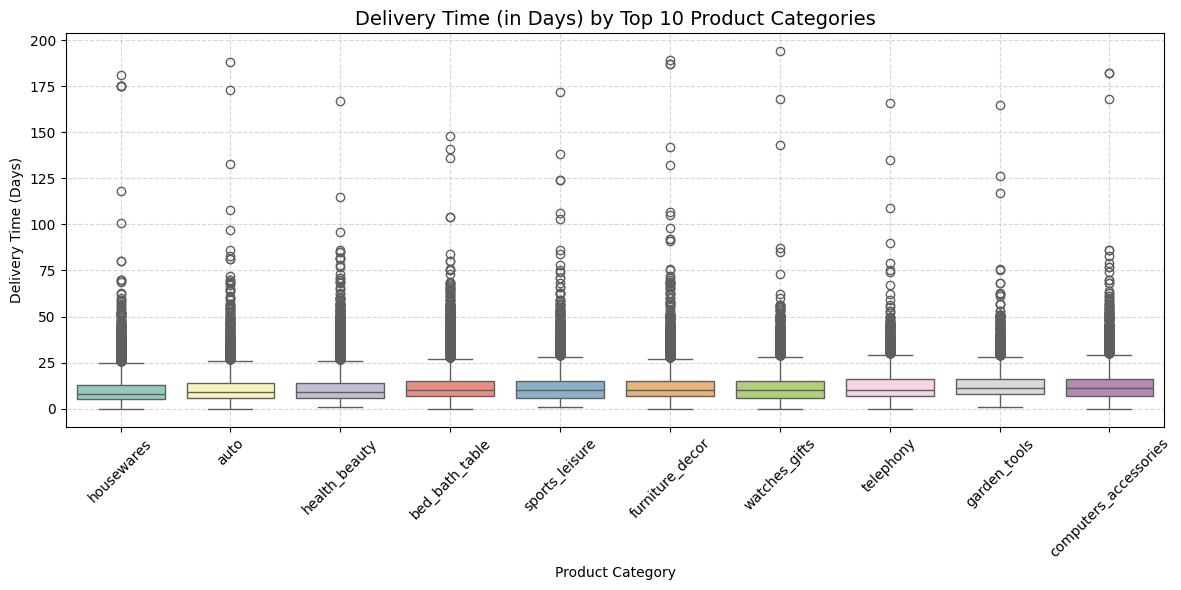

In [ ]:
# Passo 1: Deletar valores faltantes ou inválido no tempo de delivery
df_filtered = eda_df[['product_category_name_english', 'delivery_time_days']]
df_filtered = df_filtered[df_filtered['delivery_time_days'] >= 0]

# Passo 2: Gerar o top 10 mais frequente de categoria de produto
top_categories = df_filtered['product_category_name_english'].value_counts().nlargest(10).index
df_top = df_filtered[df_filtered['product_category_name_english'].isin(top_categories)]

# Passo 3: Calcular a mediana do tempo de entrega por categoria e fazer a ordenação
category_order = (
    df_top.groupby('product_category_name_english')['delivery_time_days']
    .median()
    .sort_values()
    .index
)

# Verificar consistencia na paleta de cores 
palette = sns.color_palette("Set3", n_colors=len(category_order))

# Criar dicionário para mapear nomes de categoria a cores
color_mapping = dict(zip(category_order, palette))

# Geração
plt.figure(figsize=(12, 6))
sns.boxplot(
    x='product_category_name_english',
    y='delivery_time_days',
    data=df_top,
    order=category_order,
    palette=color_mapping
)
plt.xticks(rotation=45)
plt.title('Tempo de Entrega (em Dias) dos Top 10 Categorias de Produtos', fontsize=14)
plt.xlabel('Categoria de Produto')
plt.ylabel('Tempo de Entrega (Dias)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


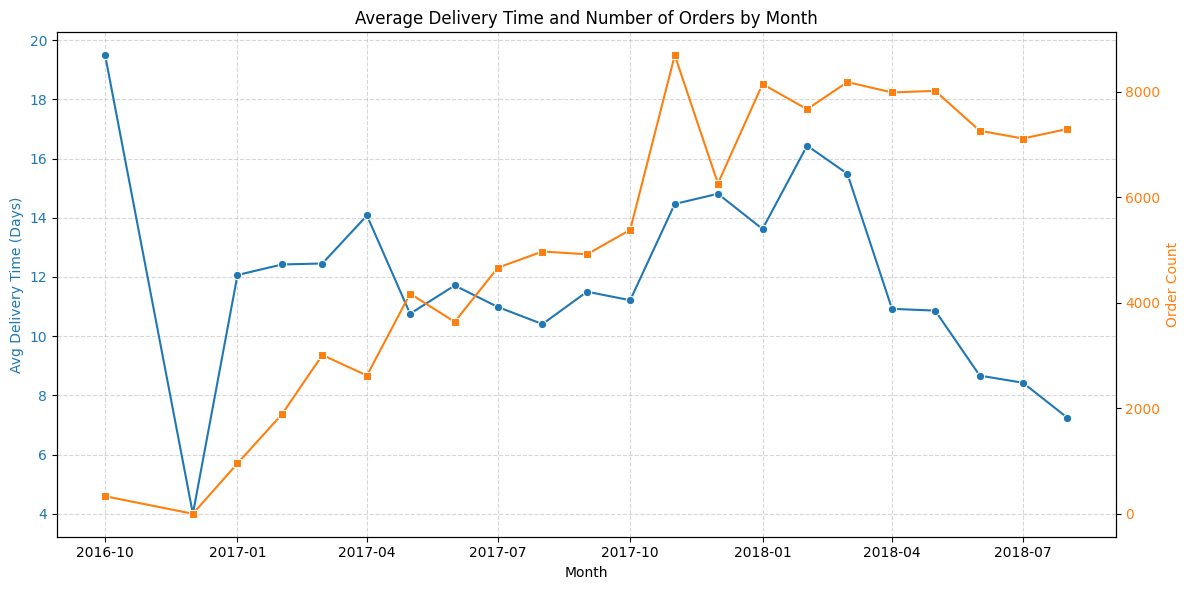

In [ ]:
# Verificar se a coluna de data está convertida para datetime
#eda_df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])
#eda_df['order_delivered_customer_date'] = pd.to_datetime(df['order_delivered_customer_date'])

# Calcular tempo de entrega em dias
eda_df['delivery_time_days'] = (eda_df['order_delivered_customer_date'] - eda_df['order_purchase_timestamp']).dt.days

# Extrair mês como período
eda_df['purchase_month'] = eda_df['order_purchase_timestamp'].dt.to_period('M')

# Agregação: avg tempo de entrega e ordernar soma por mês
monthly_stats = (
    eda_df[eda_df['delivery_time_days'] >= 0]  # filtrar tirando negativo ou invalido
    .groupby('purchase_month')
    .agg(
        avg_delivery_time=('delivery_time_days', 'mean'),
        order_count=('order_id', 'count')
    )
    .reset_index()
)

# Converter Periodo para Datetime
monthly_stats['purchase_month'] = monthly_stats['purchase_month'].dt.to_timestamp()

# Gerar com dois eixos
fig, ax1 = plt.subplots(figsize=(12, 6))

color1 = 'tab:blue'
ax1.set_xlabel('Mês')
ax1.set_ylabel('Média de Tempo de Entrega (Dias)', color=color1)
sns.lineplot(data=monthly_stats, x='purchase_month', y='avg_delivery_time', marker='o', ax=ax1, color=color1)
ax1.tick_params(axis='y', labelcolor=color1)
ax1.grid(True, linestyle='--', alpha=0.5)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color2 = 'tab:orange'
ax2.set_ylabel('Soma de Pedido', color=color2)
sns.lineplot(data=monthly_stats, x='purchase_month', y='order_count', marker='s', ax=ax2, color=color2)
ax2.tick_params(axis='y', labelcolor=color2)

plt.title('Média de Tempo de Entrega e Número de Pedidos por Mês')
fig.tight_layout()
plt.show()


Text(0.5, 1.0, 'Shipping Delay Distribution')

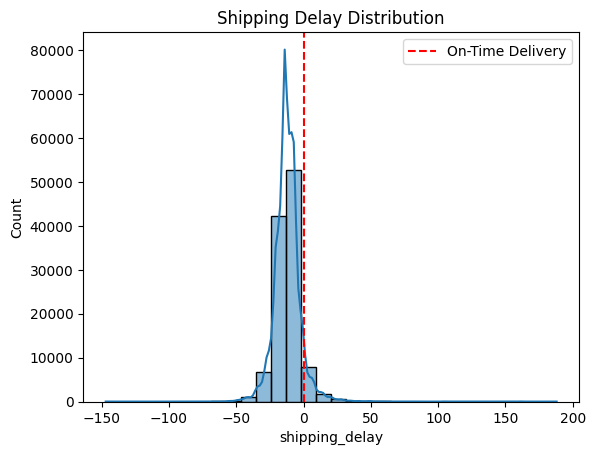

In [ ]:
#
sns.histplot(eda_df['shipping_delay'], bins=30, kde=True)
plt.axvline(0, color='red', linestyle='--', label='On-Time Delivery')
plt.legend()
plt.title('Distribuição de Atraso de Envio')

Text(0.5, 1.0, 'Delivery Time (Days)')

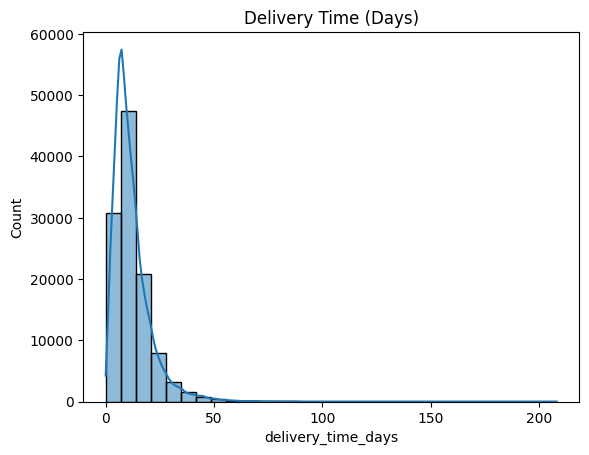

In [ ]:
sns.histplot(eda_df['delivery_time_days'], kde=True, bins=30)
plt.title('Tempo de Entrega (Dias)')

In [47]:
eda_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 113193 entries, 0 to 115607
Data columns (total 49 columns):
 #   Column                                  Non-Null Count   Dtype         
---  ------                                  --------------   -----         
 0   order_id                                113193 non-null  object        
 1   customer_id                             113193 non-null  object        
 2   order_status                            113193 non-null  object        
 3   order_purchase_timestamp                113193 non-null  datetime64[ns]
 4   order_approved_at                       113193 non-null  datetime64[ns]
 5   order_delivered_carrier_date            113193 non-null  datetime64[ns]
 6   order_delivered_customer_date           113193 non-null  datetime64[ns]
 7   order_estimated_delivery_date           113193 non-null  datetime64[ns]
 8   order_item_id                           113193 non-null  int64         
 9   product_id                              11

### Parte 2: Modelos de Machine Learning

In [48]:
# --- Passo 3: Modelos baseados em texto ---
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


# Filtrando dados
eda_df = eda_df[eda_df['review_comment_message'].notnull()]

# Divisão treino-teste
X_text = eda_df['review_comment_message']
y = eda_df['review_comment_message_clean_sentiment']
X_train_text, X_test_text, y_train, y_test = train_test_split(X_text, y, test_size=0.2, random_state=42)

# Ordem dos rótulos para a matriz de confusão
label_order = ['Negativo', 'Neutro', 'Positivo']

# Global results dictionary
text_results = {}


--- Logistic Regression ---
              precision    recall  f1-score   support

    Negativo       0.79      0.68      0.73      3361
      Neutro       0.52      0.05      0.09      1857
    Positivo       0.88      0.98      0.93     17421

    accuracy                           0.86     22639
   macro avg       0.73      0.57      0.58     22639
weighted avg       0.83      0.86      0.83     22639



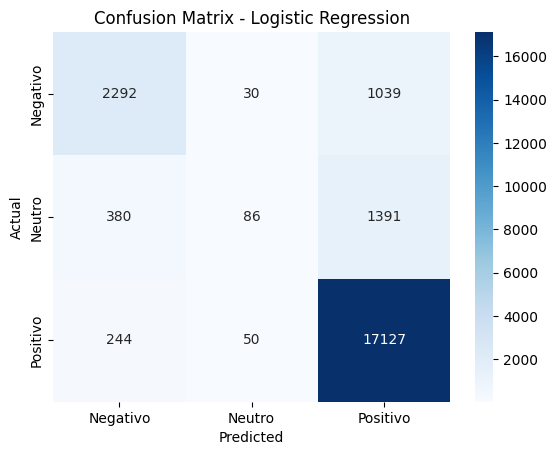

In [ ]:
#Regressão Logística
lg_model = LogisticRegression(max_iter=1000)

lg_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', lg_model)
])

lg_pipeline.fit(X_train_text, y_train)
lg_y_pred = lg_pipeline.predict(X_test_text)
lg_acc = accuracy_score(y_test, lg_y_pred)
text_results['Logistic Regression'] = lg_acc

print("\n--- Logistic Regression ---")
print(classification_report(y_test, lg_y_pred))

lg_cm = confusion_matrix(y_test, lg_y_pred, labels=label_order)
sns.heatmap(lg_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_order, yticklabels=label_order)
plt.title('Matriz de Confusão - Regressão Logística')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()



Top features for class: Negativo


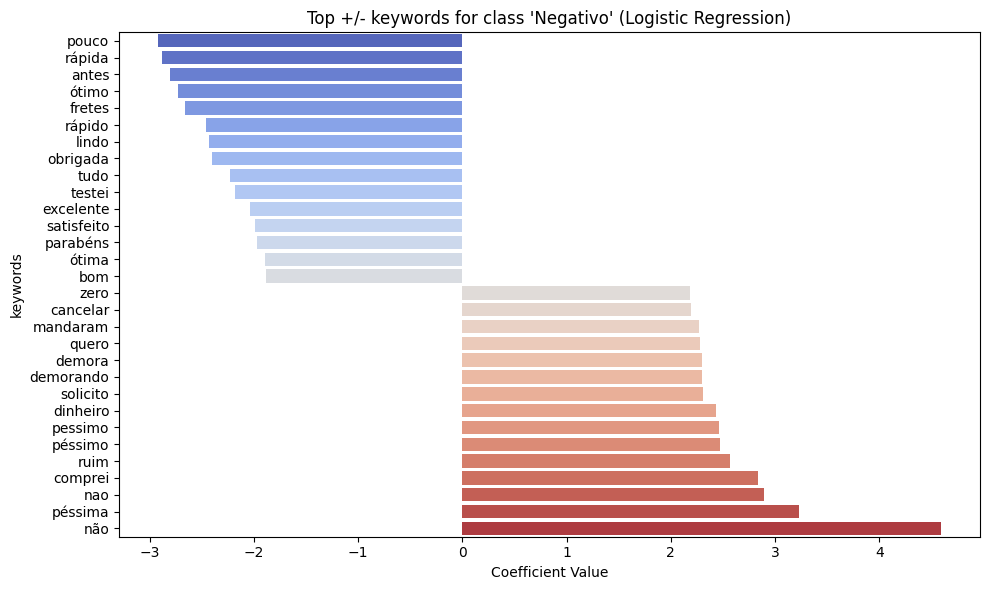


Top features for class: Neutro


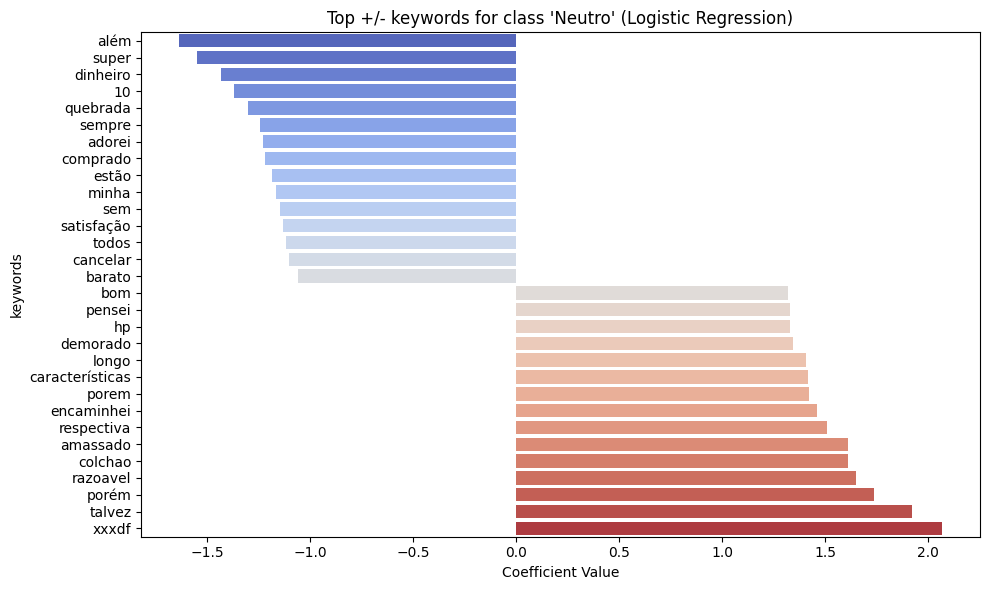


Top features for class: Positivo


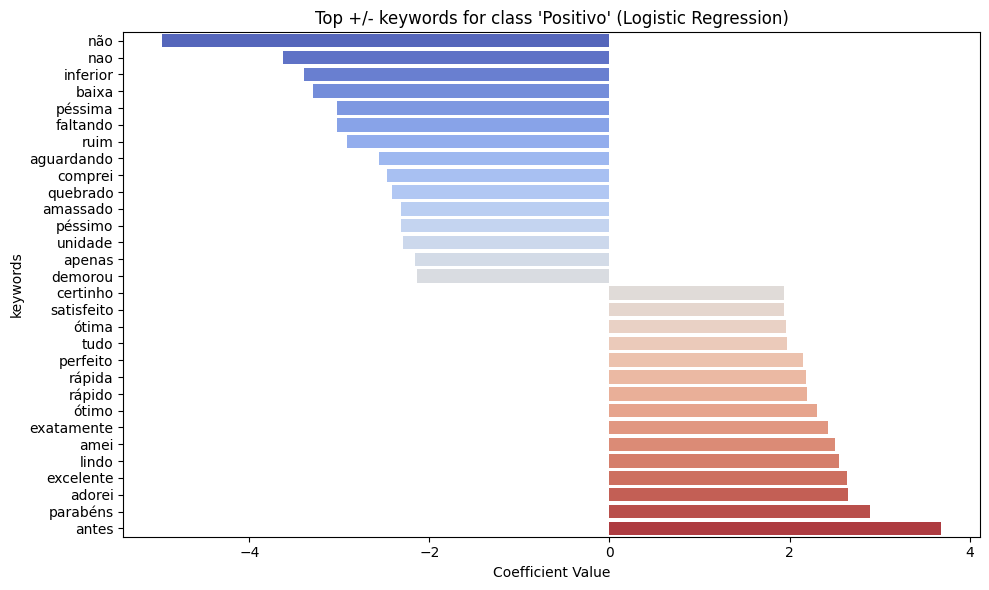

In [ ]:
import numpy as np

# Extrair o vetor TF-IDF ajustado e o classificador do pipeline
lg_vectorizer = lg_pipeline.named_steps['tfidf']
lg_classifier = lg_pipeline.named_steps['clf']

# Obter nomes de recursos e coeficientes correspondentes
lg_feature_names = lg_vectorizer.get_feature_names_out()
lg_coefficients = lg_classifier.coef_

# Para classificação multiclasse (3 classes: negativa, neutra, positiva)
# Uma linha por classe em `coefficients`, então analisamos cada uma separadamente
for i, class_label in enumerate(lg_classifier.classes_):
    print(f"\nPrincipais recursos para a classe: {class_label}")

    # Obter os principais índices de características positivas e negativas
    top_indices = np.argsort(lg_coefficients[i])[-15:]
    bottom_indices = np.argsort(lg_coefficients[i])[:15]

    top_features = [(lg_feature_names[j], lg_coefficients[i][j]) for j in top_indices]
    bottom_features = [(lg_feature_names[j], lg_coefficients[i][j]) for j in bottom_indices]

    # Combinar e Gerar
    combined = bottom_features + top_features
    features, importances = zip(*combined)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances, y=features, palette="coolwarm")
    plt.title(f"Top +/- Palavras para classe '{class_label}' (Regressão Logística)")
    plt.xlabel("Coefficient Value")
    plt.ylabel("keywords")
    plt.tight_layout()
    plt.show()



--- LinearSVC ---
              precision    recall  f1-score   support

    Negativo       0.79      0.67      0.73      3361
      Neutro       0.52      0.08      0.13      1857
    Positivo       0.88      0.98      0.93     17421

    accuracy                           0.86     22639
   macro avg       0.73      0.58      0.60     22639
weighted avg       0.84      0.86      0.83     22639



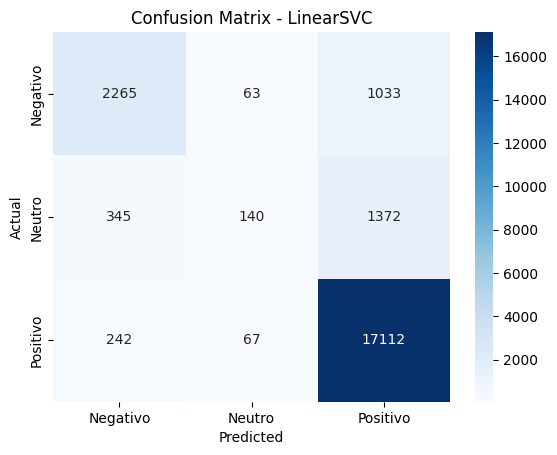

In [ ]:
#Support Vector Classifier (SVC)
from sklearn.svm import LinearSVC

svc_model = LinearSVC()

svc_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', svc_model)
])

svc_pipeline.fit(X_train_text, y_train)
svc_y_pred = svc_pipeline.predict(X_test_text)
svc_acc = accuracy_score(y_test, svc_y_pred)
text_results['LinearSVC'] = svc_acc

print("\n--- LinearSVC ---")
print(classification_report(y_test, svc_y_pred))

svc_cm = confusion_matrix(y_test, svc_y_pred, labels=['Negativo', 'Neutro', 'Positivo'])
sns.heatmap(svc_cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negativo', 'Neutro', 'Positivo'], yticklabels=['Negativo', 'Neutro', 'Positivo'])
plt.title('Matriz de Confusão - LinearSVC')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()




Top features for class: Negativo


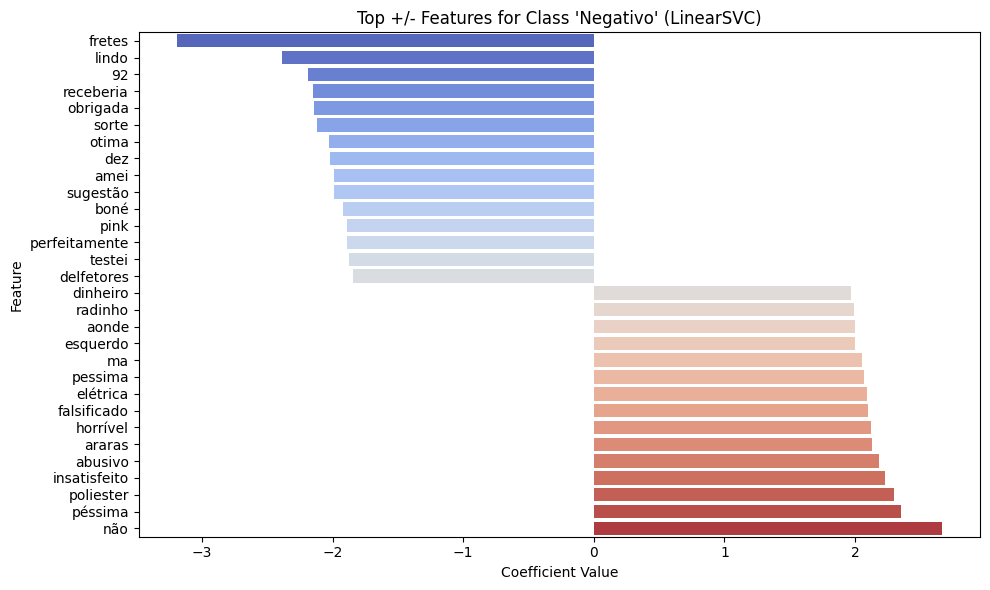


Top features for class: Neutro


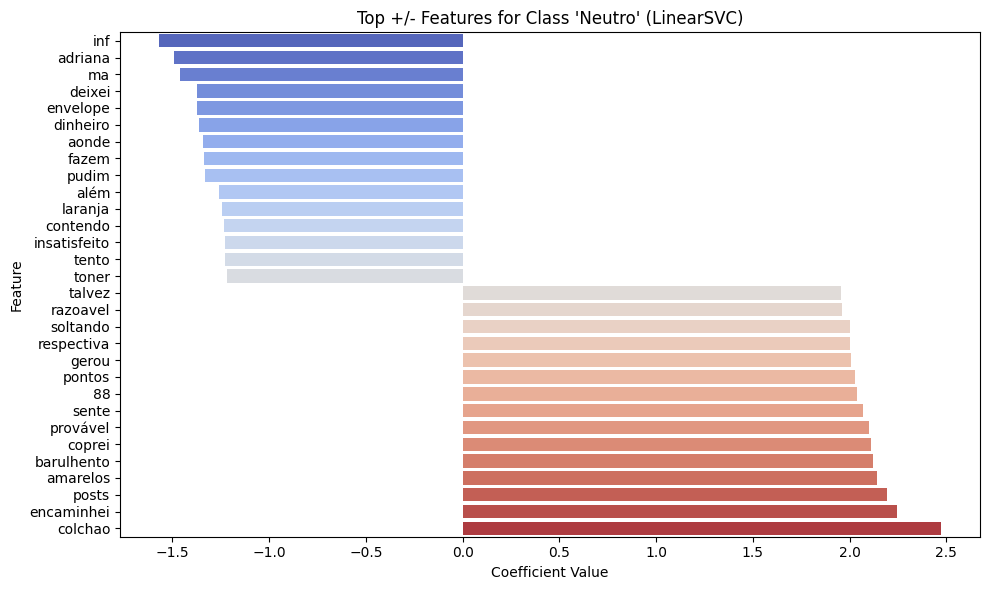


Top features for class: Positivo


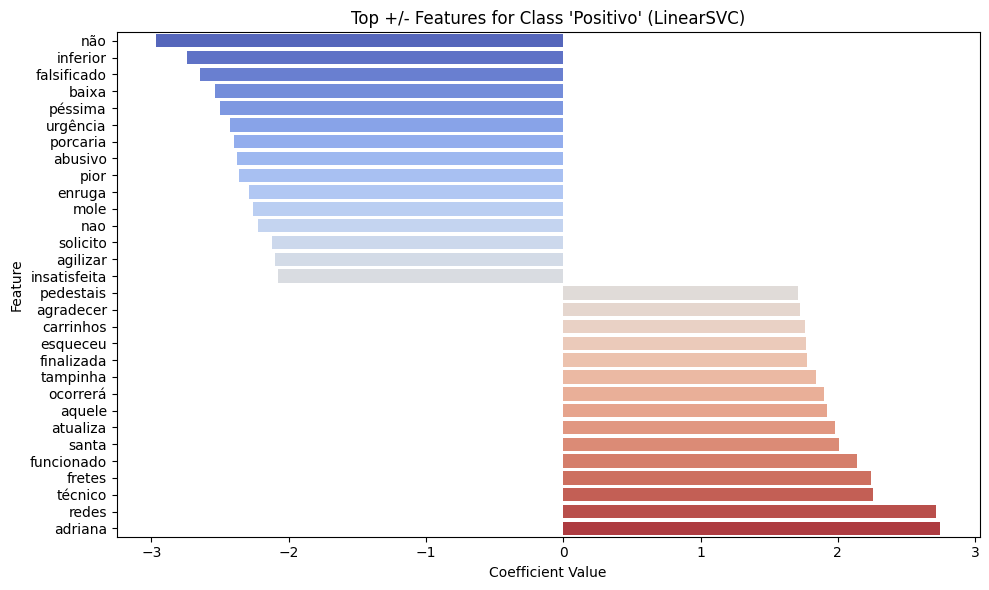

In [ ]:
# Extrair o vetor TF-IDF ajustado e o classificador do pipeline
svc_vectorizer = svc_pipeline.named_steps['tfidf']
svc_classifier = svc_pipeline.named_steps['clf']

# Obter nomes de recursos e coeficientes correspondentes
svc_feature_names = svc_vectorizer.get_feature_names_out()
svc_coefficients = svc_classifier.coef_

# Para classificação multiclasse (por exemplo, negativo, neutro, positivo)
# Uma linha por classe nos coeficientes, analise cada uma
for i, class_label in enumerate(svc_classifier.classes_):
    print(f"\nTop features para classe: {class_label}")

    # Obter os índices das principais características positivas e negativas
    top_indices = np.argsort(svc_coefficients[i])[-15:]
    bottom_indices = np.argsort(svc_coefficients[i])[:15]

    top_features = [(svc_feature_names[j], svc_coefficients[i][j]) for j in top_indices]
    bottom_features = [(svc_feature_names[j], svc_coefficients[i][j]) for j in bottom_indices]

    # Combinar para Geração
    combined = bottom_features + top_features
    features, importances = zip(*combined)

    # Geração do gráfico de barras
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importances, y=features, palette='coolwarm')
    plt.title(f"Top +/- Features para Classe '{class_label}' (LinearSVC)")
    plt.xlabel("Coefficient Value")
    plt.ylabel("Feature")
    plt.tight_layout()
    plt.show()



--- Random Forest ---
              precision    recall  f1-score   support

    Negativo       0.83      0.70      0.76      3361
      Neutro       0.90      0.15      0.25      1857
    Positivo       0.88      0.99      0.93     17421

    accuracy                           0.87     22639
   macro avg       0.87      0.61      0.65     22639
weighted avg       0.87      0.87      0.85     22639



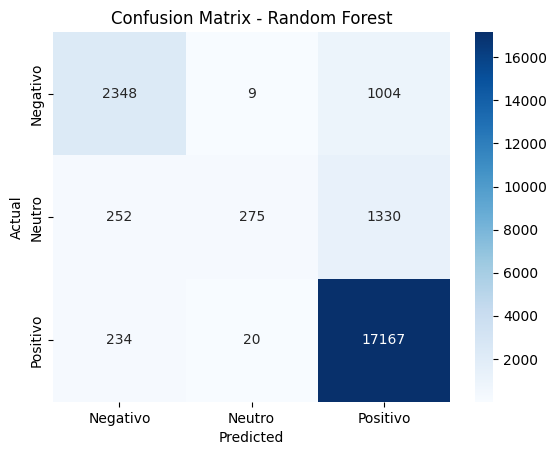

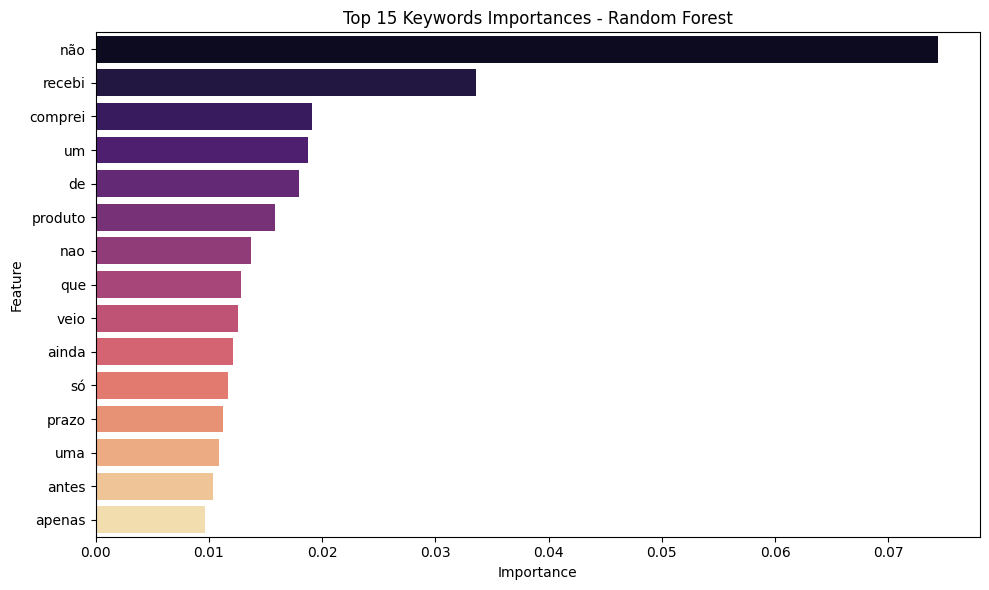

In [ ]:
#Random Forest
rm_model = RandomForestClassifier(n_estimators=100, random_state=42)

rm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', rm_model)
])

rm_pipeline.fit(X_train_text, y_train)
rm_y_pred = rm_pipeline.predict(X_test_text)
rm_acc = accuracy_score(y_test, rm_y_pred)
text_results['Random Forest'] = rm_acc

print("\n--- Random Forest ---")
print(classification_report(y_test, rm_y_pred))

rm_cm = confusion_matrix(y_test, rm_y_pred, labels=label_order)
sns.heatmap(rm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_order, yticklabels=label_order)
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

# Importância da Funcionalidade Opcional
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train_text)
rm_model.fit(X_train_tfidf, y_train)
importances = rm_model.feature_importances_
feature_names = tfidf.get_feature_names_out()
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='magma')
plt.title('Top 15 Palavras Importantes - Random Forest')
plt.tight_layout()
plt.show()



--- AdaBoost ---
              precision    recall  f1-score   support

    Negativo       0.69      0.43      0.53      3361
      Neutro       0.00      0.00      0.00      1857
    Positivo       0.83      0.98      0.90     17421

    accuracy                           0.82     22639
   macro avg       0.51      0.47      0.48     22639
weighted avg       0.74      0.82      0.77     22639



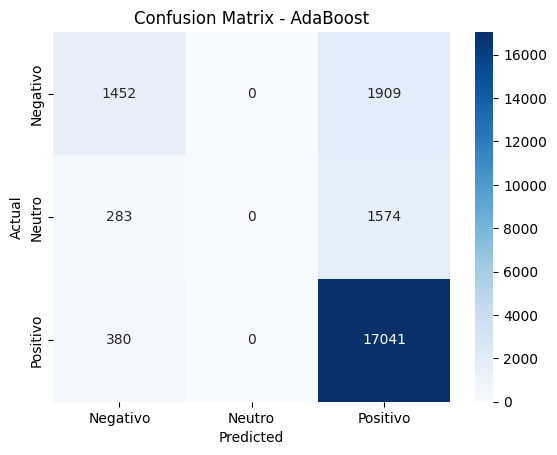

In [ ]:
#AdaBoost
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)

ada_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', ada_model)
])

ada_pipeline.fit(X_train_text, y_train)
ada_y_pred = ada_pipeline.predict(X_test_text)
ada_acc = accuracy_score(y_test, ada_y_pred)
text_results['AdaBoost'] = ada_acc

print("\n--- AdaBoost ---")
print(classification_report(y_test, ada_y_pred))

ada_cm = confusion_matrix(y_test, ada_y_pred, labels=label_order)
sns.heatmap(ada_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_order, yticklabels=label_order)
plt.title('Matriz de Confusão - AdaBoost')
plt.xlabel('Predição')
plt.ylabel('Atual')
plt.show()


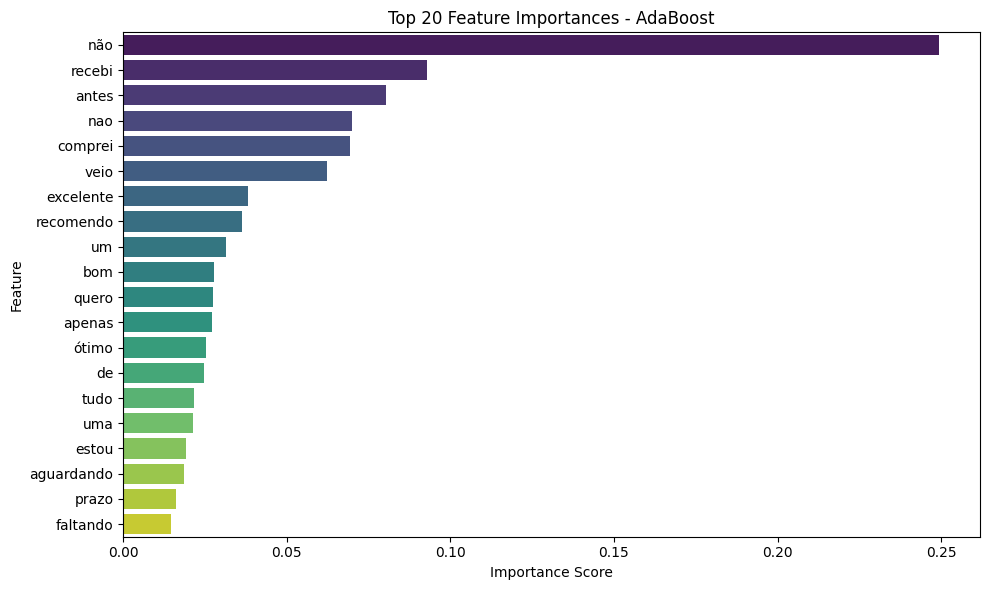

In [ ]:
# Extrair o vetor TF-IDF ajustado e o classificador do pipeline
ada_vectorizer = ada_pipeline.named_steps['tfidf']
ada_classifier = ada_pipeline.named_steps['clf']

# Obter nomes de recursos e importâncias
feature_names = ada_vectorizer.get_feature_names_out()

# Verifique se o modelo suporta feature_importances_
if hasattr(ada_classifier, 'feature_importances_'):
    importances = ada_classifier.feature_importances_

    # Crie um DataFrame para melhor visualização
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    })

    #Ordenar por importância
    top_features_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

    # Gerar o TOP 20
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=top_features_df, palette='viridis')
    plt.title('Top 20 Feature Importances - AdaBoost')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print("O modelo não suporta feature_importances_")



--- XGBoost ---
              precision    recall  f1-score   support

    Negativo       0.77      0.67      0.72      3361
      Neutro       0.63      0.06      0.11      1857
    Positivo       0.87      0.98      0.92     17421

    accuracy                           0.86     22639
   macro avg       0.76      0.57      0.58     22639
weighted avg       0.84      0.86      0.83     22639



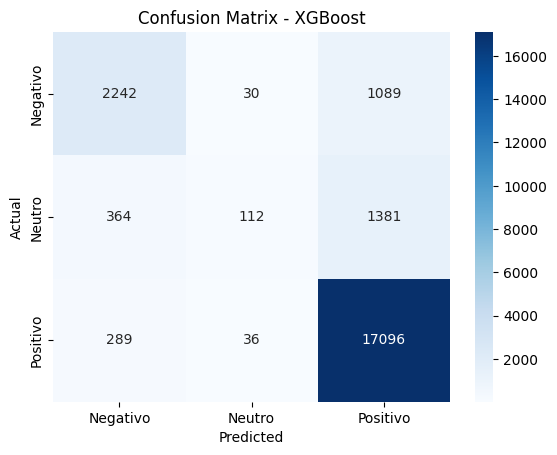

In [ ]:
#XGBoost
from sklearn.preprocessing import LabelEncoder

# Codificar rótulos de string em valores numéricos
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

# Treinar modelo XGBoost usando rótulos codificados
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

xgb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', xgb_model)
])

xgb_pipeline.fit(X_train_text, y_train_enc)
y_pred_enc = xgb_pipeline.predict(X_test_text)
xgb_y_pred = label_encoder.inverse_transform(y_pred_enc) # converter de volta para os rótulos originais
y_test_labels = y_test  

# Acurácia e resultados
acc = accuracy_score(y_test_labels, xgb_y_pred)
text_results['XGBoost'] = acc

print("\n--- XGBoost ---")
print(classification_report(y_test_labels, xgb_y_pred))

xgb_cm = confusion_matrix(y_test_labels, xgb_y_pred, labels=label_order)
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_order, yticklabels=label_order)
plt.title('Matriz de Confusão- XGBoost')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()


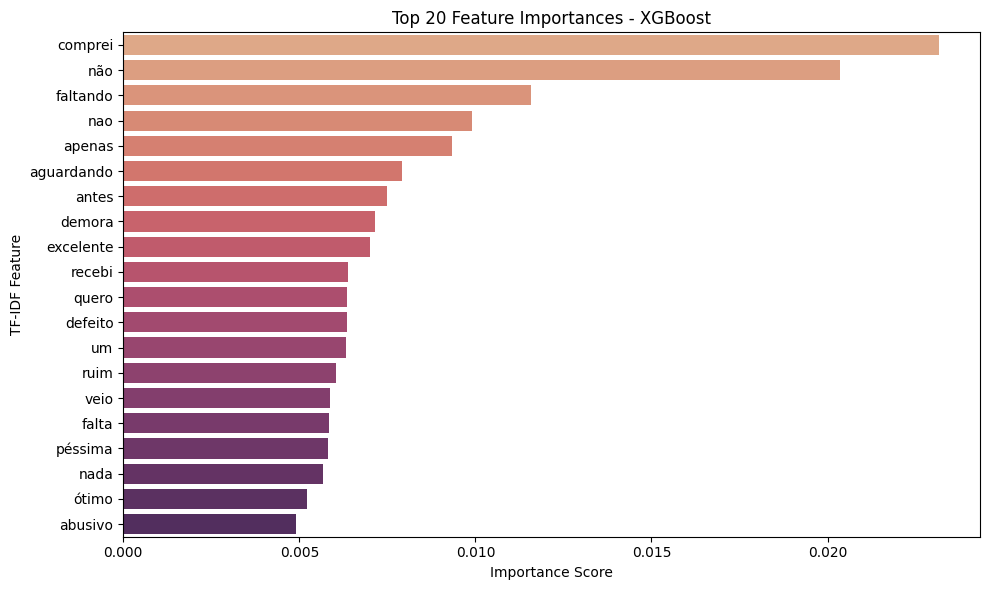

In [ ]:
# Passo 1: Extrair o vetor TF-IDF ajustado e o classificador XGBoost do pipeline
vectorizer = xgb_pipeline.named_steps['tfidf']
classifier = xgb_pipeline.named_steps['clf']

# Passo 2: Pegar nomes e scores importante
feature_names = vectorizer.get_feature_names_out()
importances = classifier.feature_importances_

# Passo 3: Criar DataFrame para Visualização
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Passo 4: Ordernar e selecionar top importance
top_features_df = importance_df.sort_values(by='Importance', ascending=False).head(20)

# Passo 5: Plot top feature importances
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features_df, x='Importance', y='Feature', palette='flare')
plt.title('Top 20 Feature Importances - XGBoost')
plt.xlabel('Importance Score')
plt.ylabel('TF-IDF Feature')
plt.tight_layout()
plt.show()


In [ ]:
# Criar DataFrame de results dictionary
results_df = pd.DataFrame(list(text_results.items()), columns=['Model', 'Accuracy'])

# Order por accuracy
results_df = results_df.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)

# Resultados
print("\n--- Comparação de Modelo por Acurácia ---")
print(results_df)

# Melhor modelo
best_model = results_df.iloc[0]
print(f"\n✅ Melhor modelo: {best_model['Model']} com Accuracy: {best_model['Accuracy']:.4f}")




--- Model Accuracy Comparison ---
                 Model  Accuracy
0        Random Forest  0.874155
1            LinearSVC  0.862096
2  Logistic Regression  0.861566
3              XGBoost  0.859137
4             AdaBoost  0.816865

✅ Best Model: Random Forest with Accuracy: 0.8742


### Part 3 - HyperTune o Modelo Random Forest (Melhor Modelo)
`n_estimators:` Number of tres in the forest
`max_depth:` Maximum depth of each tree
`min_sample_split:` Minimum samples required to split an internal node
`min_sample_leaf:` Minimum samples required to be at a leaf node
`max_features:` Number os features to consider when lookin for the best split
`bootstrap:` Whether bootstrap samples are used when building trees

Fitting 3 folds for each of 16 candidates, totalling 48 fits

--- Tuned Random Forest ---
Best Parameters: {'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 150}
Accuracy: 0.8743319051194841
              precision    recall  f1-score   support

    Negativo       0.83      0.70      0.76      3361
      Neutro       0.92      0.15      0.25      1857
    Positivo       0.88      0.99      0.93     17421

    accuracy                           0.87     22639
   macro avg       0.88      0.61      0.65     22639
weighted avg       0.88      0.87      0.85     22639



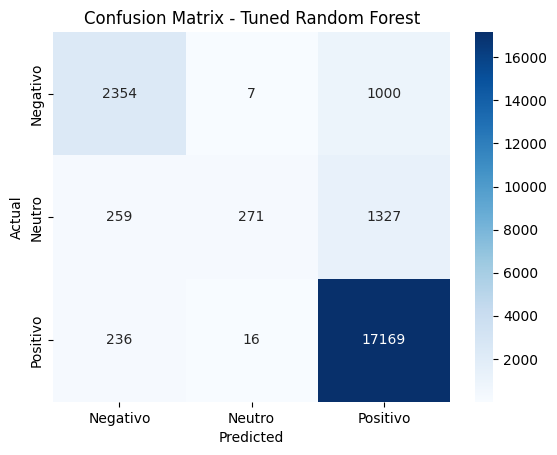

In [ ]:
#Hyperparameter Tuning with GridSearchCV
from sklearn.model_selection import GridSearchCV

# --- Passo 0: Use uma amostra menor para ajuste mais rápido ---
X_train_small = X_train_text[:2000]
y_train_small = y_train[:2000]

# --- Passo 1: Definir grade de parâmetros (simplificada) ---
param_grid = {
    'clf__n_estimators': [100, 150],
    'clf__max_depth': [10, None],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2],
    'clf__max_features': ['sqrt']
}

# --- Passo 2: Definir pipeline ---
rm_model = RandomForestClassifier(random_state=42)
rm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', rm_model)
])

# --- Passo 3: Run Grid Search em pequenos dados ---
grid_search = GridSearchCV(
    rm_pipeline,
    param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_small, y_train_small)

# --- Passo 4: Treinar o melhor modelo com o 100% dos dados de treino para teste ---
best_model = grid_search.best_estimator_
best_model.fit(X_train_text, y_train)

# --- Passo 5: Avaliar nos dados de teste---
rm_y_pred = best_model.predict(X_test_text)
rm_acc = accuracy_score(y_test, rm_y_pred)
text_results['Random Forest Tuned'] = rm_acc

print("\n--- Tuned Random Forest ---")
print("Melhores Parâmetros:", grid_search.best_params_)
print("Acurácia:", rm_acc)
print(classification_report(y_test, rm_y_pred))

# --- Passo 6: Gerar Matriz de Confusão ---
rm_cm = confusion_matrix(y_test, rm_y_pred, labels=label_order)
sns.heatmap(rm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_order, yticklabels=label_order)
plt.title('Matriz de Confusão - Tuned Random Forest')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()


Fitting 3 folds for each of 1 candidates, totalling 3 fits

--- Tuned Random Forest ---
Best Parameters: {'clf__max_depth': None, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 150}
Accuracy: 0.8743319051194841
              precision    recall  f1-score   support

    Negativo       0.83      0.70      0.76      3361
      Neutro       0.92      0.15      0.25      1857
    Positivo       0.88      0.99      0.93     17421

    accuracy                           0.87     22639
   macro avg       0.88      0.61      0.65     22639
weighted avg       0.88      0.87      0.85     22639



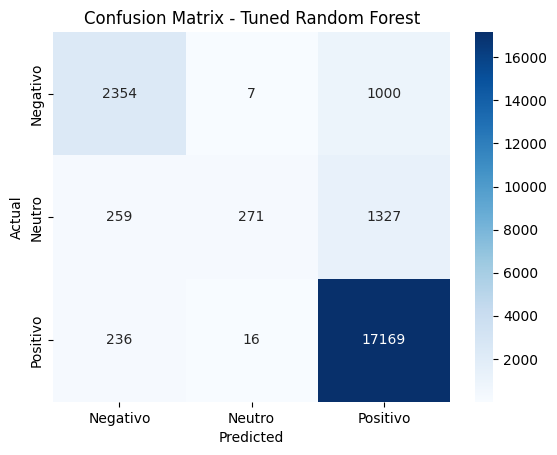

In [ ]:
# --- Passo 1: Definir parameter grid (simplificado) ---
param_grid = {
    'clf__n_estimators': [150],
    'clf__max_depth': [None],
    'clf__min_samples_split': [5],
    'clf__min_samples_leaf': [1],
    'clf__max_features': ['sqrt']
}

# --- Passo 2: Definir pipeline ---
rm_model = RandomForestClassifier(random_state=42)
rm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('clf', rm_model)
])

# --- Passo 3: Rodar Grid Search em poucos dados ---
grid_search = GridSearchCV(
    rm_pipeline,
    param_grid,
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_text, y_train)

# --- Passo 4: Treinar o melhor modelo com 100% dos dados para treino ---
best_model = grid_search.best_estimator_
best_model.fit(X_train_text, y_train)

# --- Passo 5: Analisar on dados para teste---
rm_y_pred = best_model.predict(X_test_text)
rm_acc = accuracy_score(y_test, rm_y_pred)
text_results['Random Forest Tuned'] = rm_acc

print("\n--- Tuned Random Forest ---")
print("Best Parameters:", grid_search.best_params_)
print("Accuracy:", rm_acc)
print(classification_report(y_test, rm_y_pred))

# --- Passo 6: Gerar matriz de confusão ---
rm_cm = confusion_matrix(y_test, rm_y_pred, labels=label_order)
sns.heatmap(rm_cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_order, yticklabels=label_order)
plt.title('Matriz de confusão - Tuned Random Forest')
plt.xlabel('Predição')
plt.ylabel('Real')
plt.show()

In [ ]:
#Hyperparameter TUning with RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'clf__n_estimators': randint(100, 300),
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2],
    'clf__max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    rm_pipeline,
    param_distributions=param_dist,
    n_iter=15,  # muito mais rápido que a grade completa
    cv=3,
    scoring='accuracy',
    random_state=42,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train_text, y_train)

# Analise
best_model = random_search.best_estimator_
rm_y_pred = best_model.predict(X_test_text)
rm_acc = accuracy_score(y_test, rm_y_pred)
print("Random Search Acurácia:", rm_acc)


Fitting 3 folds for each of 15 candidates, totalling 45 fits
Random Search Accuracy: 0.874596934493573


In [62]:
print(random_search.best_estimator_)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=5000)),
                ('clf',
                 RandomForestClassifier(min_samples_split=5, n_estimators=174,
                                        random_state=42))])
